# Práctica Final del módulo de Machine Learning
##### Amparo Alías Cuesta
**------------------------------------------------------------------------------------------------------------------**

## Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
from datetime import datetime
from sklearn.model_selection import train_test_split

## Work with train dataset

In [3]:
data = pd.read_csv('./train.csv', sep=';', decimal='.')

In [4]:
data.head().T

,0,1,2,3,4
ID,15534373,15245258,14073453,14888694,16423558
Listing Url,https://www.airbnb.com/rooms/15534373,https://www.airbnb.com/rooms/15245258,https://www.airbnb.com/rooms/14073453,https://www.airbnb.com/rooms/14888694,https://www.airbnb.com/rooms/16423558
Scrape ID,20170407214119,20170407214050,20170407214119,20170407214119,20170404145355
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-05
Name,Great Room Airport (Metro 7/8 min. walk),Artist work space in Born wifi+ac,manzanares centro de Madrid,Habitacion con baño independiente,Cozy flat Montmartre
Summary,ARRIVED IN MADRID AND WANNA BOOK After 00h00 ?...,Un oasis de tranquilidad en pleno corazón de B...,"Mi alojamiento es bueno para parejas, aventure...","Habitacion amplia, luminosa y acogedora con ba...",Lugares de interés: Le Bloc. Mi alojamiento es...
Space,Estupendo espacio para descansar o hacer una p...,"Su exigüísimo ambiente inspirador, todo el mat...",NaN,NaN,NaN
Description,ARRIVED IN MADRID AND WANNA BOOK After 00h00 ?...,Un oasis de tranquilidad en pleno corazón de B...,"Mi alojamiento es bueno para parejas, aventure...","Habitacion amplia, luminosa y acogedora con ba...",Lugares de interés: Le Bloc. Mi alojamiento es...
Experiences Offered,none,none,none,none,none
Neighborhood Overview,NaN,NaN,NaN,NaN,NaN


### Toma de contacto con las variables

Eliminamos las columnas que no nos aportan información a primera vista. Están agrupados en las siguientes listas:
- non_informative --> 
- urls -->
- text -->
- non_relevant_dates -->
- delete -->
- host_info -->

In [5]:
non_informative = ['ID', 'Scrape ID', 'Last Scraped', 'Name']

urls = ['Listing Url','Thumbnail Url', 'Medium Url','Picture Url', 'XL Picture Url',
       'Host URL','Host Thumbnail Url', 'Host Picture Url']

text = ['Summary', 'Space','Description','Neighborhood Overview', 'Notes','Transit','Access',
        'Interaction','House Rules','Host About']

non_relevant_dates = ['Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review']

delete = ['Weekly Price', 'Monthly Price'] #pq queremos predecir 'price'

host_info = ['Host ID','Host Name','Host Location','Host Neighbourhood','Calculated host listings count',
             'Host Listings Count', 'Host Total Listings Count']


In [6]:
data.drop(non_informative, axis = 1, inplace = True)
data.drop(urls, axis = 1, inplace = True)
data.drop(text, axis = 1, inplace = True)
data.drop(non_relevant_dates, axis = 1, inplace = True)
data.drop(delete, axis = 1, inplace = True)
data.drop(host_info, axis = 1, inplace = True)

### Visualización de la distribución de la variable objetivo:

<AxesSubplot:xlabel='Price', ylabel='Density'>

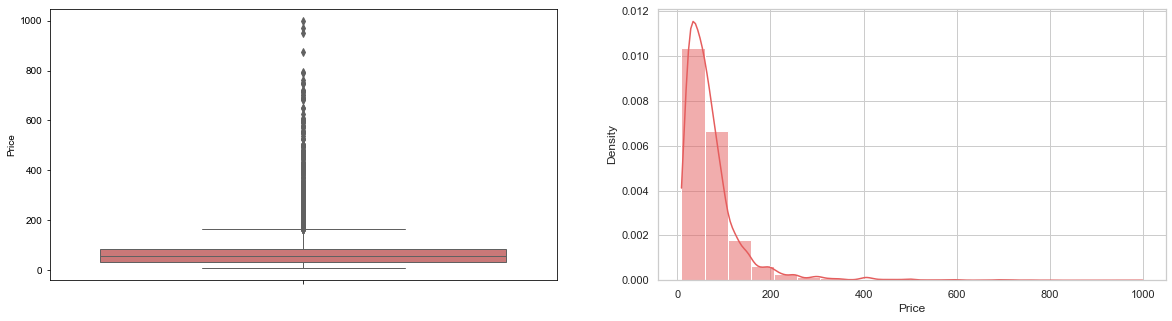

In [7]:
plt.subplots(nrows=1,ncols=2,figsize=(20,5))

plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
sns.boxplot(data=data, y='Price', saturati on = 0.6, linewidth = 1, color = '#E55D5D')
plt.subplot(1,2,2)
sns.set_theme(style="whitegrid")
sns.histplot(data['Price'],color = '#E55D5D', bins = 20,kde = True, stat='density')

Un precio mayor de 200 se considera outlier. Por lo que vamos a hacer un filtrado y eliminaremos todos los apartamentos con precio mayor a 200.

In [8]:
print(len(data[data['Price']>200]))

455


In [9]:
data = data[data['Price']<200]

### Análisis de cada variable:

In [10]:
data.head(3)

,Experiences Offered,Host Since,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Reviews per Month,Geolocation,Features
0,none,2016-09-21,within an hour,100.0,NaN,"email,phone,linkedin,reviews,jumio,government_id","Madrid, Comunidad de Madrid 28042, Spain",NaN,Timón,Barajas,Madrid,Comunidad de Madrid,28042,Madrid,"Madrid, Spain",ES,Spain,40.475645,-3.601166,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Wheelchair accessible,Kitche...",NaN,35.0,NaN,NaN,1,16,1,1125,NaN,21,49,79,80,27,97.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,strict,4.74,"40.475644753,-3.60116611992","Host Has Profile Pic,Host Identity Verified,Re..."
1,none,2016-09-27,within an hour,100.0,NaN,"email,phone,reviews,jumio,offline_government_i...","Barcelona, Catalunya 08003, Spain",NaN,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,Barcelona,Catalunya,08003,Barcelona,"Barcelona, Spain",ES,Spain,41.383953,2.180794,Loft,Entire home/apt,2,1.5,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,120.0,200.0,NaN,1,0,31,1125,NaN,16,35,50,283,3,87.0,9.0,8.0,10.0,10.0,9.0,8.0,NaN,NaN,strict,0.95,"41.3839533141,2.18079409901","Host Has Profile Pic,Host Identity Verified,Re..."
2,none,2015-09-24,within a few hours,93.0,NaN,"email,phone,reviews,jumio","Imperial, Madrid, Comunidad de Madrid 28005, S...",Imperial,Imperial,Arganzuela,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.412175,-3.718404,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",NaN,49.0,90.0,20.0,3,8,2,1125,NaN,11,15,15,77,17,88.0,8.0,9.0,9.0,9.0,9.0,9.0,NaN,NaN,strict,2.02,"40.4121751555,-3.71840354351","Host Has Profile Pic,Host Identity Verified,Is..."


<br>

Viendo el head de la data, sorprende los muchos 'none' que hay en la variable "Experiences Offered" asique analizamos cuantas veces está presente cada valor:

In [11]:
data['Experiences Offered'].value_counts()

none        11272
business        6
social          3
romantic        2
family          2
Name: Experiences Offered, dtype: int64

In [12]:
ratio = data['Experiences Offered'].value_counts()[0]/len(data['Experiences Offered'])
print(f"Ratio de veces que aparece 'none' en el dataset: {np.round(ratio,4)*100}%")

Ratio de veces que aparece 'none' en el dataset: 99.88%


Al tener un 99.86% de instancias con el mismo valor, podemos considerarlo casi constante y por lo tanto que no aporta información a la hora de predecir

In [13]:
data.drop('Experiences Offered', axis = 1, inplace = True)

<br>

Geolocation contiene la misma info que longitude y latitude:

In [14]:
data[['Latitude', 'Longitude', 'Geolocation']].head(3)

,Latitude,Longitude,Geolocation
0,40.475645,-3.601166,"40.475644753,-3.60116611992"
1,41.383953,2.180794,"41.3839533141,2.18079409901"
2,40.412175,-3.718404,"40.4121751555,-3.71840354351"


In [15]:
data.drop('Geolocation', axis = 1, inplace = True)

<br>

Analizamos las variables que hacen referencia a la **localización del piso** 

In [16]:
cols_location = ['Street', 'Neighbourhood','Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 
                 'City','State', 'Zipcode', 'Market', 'Smart Location', 'Country Code','Country']

In [17]:
#data['City'].value_counts()
ratio = np.round((data['City'].value_counts()['Madrid']/data.shape[0])*100,2)
print(f"Ratio de valores en 'City' que son 'Madrid':\t{ratio}% ")

Ratio de valores en 'City' que son 'Madrid':	90.9% 


Eliminamos todo lo que no sea Madrid

In [18]:
print(f"Eliminamos: {len(data[data['City']!='Madrid'])} instancias")
print(f"Que representa el {np.round((len(data[data['City']!='Madrid'])/data.shape[0])*100,2)}% de instancias")
#comprobamos:
#ratio + 9.1 = 100

Eliminamos: 1027 instancias
Que representa el 9.1% de instancias


Parece un porcentaje elevado, pero de esta forma nos centramos en predecir para la ciudad de Madrid y tratar de maximizar la accuracy con las características concretas de esta ciudad. Ya que del resto de ciudades y paises tenemos muchas menos instancias y al cambiar las condiciones puede verse afectada la predicción del precio.

In [19]:
data.drop(data[data['City']!='Madrid'].index, inplace = True)

In [20]:
print(f"Tenemos: {data.shape[0]} filas")

Tenemos: 10258 filas


Al hacer este filtro para solo aceptar instancias de Madrid algunas columnas pueden convertirse en constantes, vamos a ver cuáles:

In [21]:
data[cols_location].apply(lambda col: len(col.unique())) 

Street                          604
Neighbourhood                    66
Neighbourhood Cleansed          125
Neighbourhood Group Cleansed     21
City                              1
State                            15
Zipcode                          70
Market                            4
Smart Location                    2
Country Code                      1
Country                           1
dtype: int64

Vemos que "City", "Country Code" y "Country" permanecen constantes. Esto significa que no aportan nada a la predicción y por lo tanto las eliminamos:

In [22]:
cols_location = set(cols_location) - set(['City','Country Code','Country'])
print("Columnas de location que nos quedan: \n",cols_location)
data.drop(['City','Country Code','Country'],axis = 1, inplace = True)

Columnas de location que nos quedan: 
 {'Zipcode', 'Neighbourhood Cleansed', 'State', 'Neighbourhood Group Cleansed', 'Smart Location', 'Street', 'Neighbourhood', 'Market'}


Nos sorprende "Smart Location" y "Market", por lo que vamos a hacer una exploración de estas columnas:

In [23]:
print(data['Smart Location'].value_counts())

Madrid, Spain     10249
Madrid , Spain        9
Name: Smart Location, dtype: int64


Vemos que realmente el valor es constante, lo unico que lo detecta como dos distintos por un espacio de diferencia

In [24]:
#print(data['Market'].value_counts())
print(np.round((data['Market'].value_counts()*100)/data.shape[0],2))

Madrid                   99.52
Other (International)     0.07
London                    0.01
Name: Market, dtype: float64


Vemos que el 99.53% de los valores en la columna "Market" son "Madrid" asique consideramos esta columna como constante y la eliminamos.

In [25]:
cols_location = set(cols_location) - set(['Smart Location','Market'])
print("Columnas de location que nos quedan: \n",cols_location)
data.drop(['Smart Location','Market'],axis = 1, inplace = True)

Columnas de location que nos quedan: 
 {'Zipcode', 'Neighbourhood Cleansed', 'State', 'Neighbourhood Group Cleansed', 'Street', 'Neighbourhood'}


Al centrarnos solo en la ciudad de Madrid, sorprende que "State" tenga 15 valores distintos por lo que vamos a hacer una exploración de los valores de esta variable:

In [26]:
data['State'].value_counts()

Comunidad de Madrid             8219
Community of Madrid             1477
Madrid                           513
Spain                              3
España                             2
MADRID                             2
Communauté de Madrid               2
madrid                             2
28                                 2
Autonome Gemeinschaft Madrid       1
Madrid \nMadrid                    1
Madrid capital                     1
Espańa                             1
Usera                              1
Name: State, dtype: int64

Vemos que realmente todos son "Madrid" pero escrito de distintas formas o haciendo referencia al país (España) que ya teníamos en otra columna y hemos eliminado.
<br> Por esto, volvemos a considerar esta columna constante y nos deshacemos de ella.

In [27]:
cols_location = set(cols_location) - set(['State'])
print("Columnas de location que nos quedan: \n",cols_location)
data.drop(['State'],axis = 1, inplace = True)

Columnas de location que nos quedan: 
 {'Zipcode', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Street', 'Neighbourhood'}


<br>

In [28]:
data[cols_location]

,Zipcode,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Street,Neighbourhood
0,28042,Timón,Barajas,"Madrid, Comunidad de Madrid 28042, Spain",NaN
2,28005,Imperial,Arganzuela,"Imperial, Madrid, Comunidad de Madrid 28005, S...",Imperial
3,28038,Portazgo,Puente de Vallecas,"Puente de Vallecas, Madrid, Comunidad de Madri...",Puente de Vallecas
5,28004,Universidad,Centro,"Malasaña, Madrid, Comunidad de Madrid 28004, S...",Malasaña
6,28003,Rios Rosas,Chamberí,"Rios Rosas, Madrid, Comunidad de Madrid 28003,...",Rios Rosas
...,...,...,...,...,...
11819,28012,Sol,Centro,"Sol, Madrid, Community of Madrid 28012, Spain",Sol
11820,28039,Berruguete,Tetuán,"Trafalgar, Madrid, Comunidad de Madrid 28039, ...",Trafalgar
11821,28013,Palacio,Centro,"Palacio, Madrid, Comunidad de Madrid 28013, Spain",Palacio
11822,28009,Jerónimos,Retiro,"Madrid, Comunidad de Madrid 28009, Spain",NaN


Vemos que la variable "street" no aporta información, ya que incluye lo que ya tenemos en otras columnas. Por lo que vamos a eliminarla también:

In [29]:
cols_location = set(cols_location) - set(['Street'])
print("Columnas de location que nos quedan: \n",cols_location)
data.drop(['Street'],axis = 1, inplace = True)

Columnas de location que nos quedan: 
 {'Neighbourhood Group Cleansed', 'Zipcode', 'Neighbourhood Cleansed', 'Neighbourhood'}


<br>

Ahora vamos a analizar la relación entre las tres variables:
<br>Neighbourhood
<br>Neighbourhood Cleansed
<br>Neighbourhood Group Cleansed

In [30]:
df = data[cols_location - set(['Zipcode'])]
df.head(5)

,Neighbourhood Group Cleansed,Neighbourhood Cleansed,Neighbourhood
0,Barajas,Timón,NaN
2,Arganzuela,Imperial,Imperial
3,Puente de Vallecas,Portazgo,Puente de Vallecas
5,Centro,Universidad,Malasaña
6,Chamberí,Rios Rosas,Rios Rosas


In [31]:
df.isnull().sum()

Neighbourhood Group Cleansed       0
Neighbourhood Cleansed             0
Neighbourhood                   3498
dtype: int64


¿Con cuál nos quedamos? 
<br> Está claro que con Neighbourhood no, ya que tiene muchos nulos. 
<br> Por lo que tenemos dos opciones:
- Neighbourhood Group Cleansed
- Neighbourhood Cleansed


In [32]:
df.apply(lambda col: len(col.unique())) 

Neighbourhood Group Cleansed     21
Neighbourhood Cleansed          125
Neighbourhood                    66
dtype: int64

Vemos que Neighbourhood Group Cleansed es mucho más robusto ya que tiene menos variedad de valores, por lo que nos vamos a quedar con ella. 

In [33]:
data.drop(['Neighbourhood', 'Neighbourhood Cleansed'],axis = 1, inplace = True)

<br>

Vamos a mirar la relación Neighbourhood Group Cleansed y Zipcode:

In [34]:
print(data.Zipcode.unique())
print(f" \nHay {data.Zipcode.isnull().sum()} valores nan.")
#print(df.Zipcode.value_counts())

['28042' '28005' '28038' '28004' '28003' '28011' '28012' '28014' '28039'
 '28013' '28023' '28015' nan '28025' '28010' '28001' '28006' '28033'
 '28028' '28047' '28009' '28029' '28044' '28037' '28045' '28041' '28046'
 '28027' '28021' '28022' '28008' '28018' '28020' '28035' '28043' '28026'
 '28031' '28016' '28007' '28019' '28002' '28032' '28030' '28053' '28036'
 '28050' '28017' '28049' '28034' '28054' '28024' '25008' '20013' '28055'
 '28040' '28051' 'Madrid 28004' '28002\n28002' '28060' '2815' '28094'
 '28052' '28058' '2015' '28051\n28051' '27013' '28056' '28105' '27004'
 '2804']
 
Hay 344 valores nan.


Con este primer vistazo vemos que hay bastantes errores: '28051\n28051' ,'-', 'Madrid 28004','2804'...
<br>Y hay 361 NaNs

In [35]:
df = data[['Neighbourhood Group Cleansed', 'Zipcode']]

grouped = df.groupby(['Neighbourhood Group Cleansed'])
for neigh in grouped.groups.keys():
    print(f"\nFor neighbourhood: {neigh} the zipcodes are: " )
    d = grouped.get_group(neigh)
    print(d['Zipcode'].value_counts())


For neighbourhood: Arganzuela the zipcodes are: 
28045    390
28005    168
28012     47
28019      3
28014      2
28047      1
28007      1
28004      1
Name: Zipcode, dtype: int64

For neighbourhood: Barajas the zipcodes are: 
28042    66
28055     1
Name: Zipcode, dtype: int64

For neighbourhood: Carabanchel the zipcodes are: 
28019    149
28025     94
28054      8
28044      6
28047      4
28005      1
Name: Zipcode, dtype: int64

For neighbourhood: Centro the zipcodes are: 
28012           1549
28004           1372
28013            773
28005            746
28014            410
28015            236
28008             15
28045              4
28001              2
27013              1
25008              1
20013              1
28034              1
28010              1
28003              1
28056              1
2015               1
28033              1
Madrid 28004       1
27004              1
2804               1
28094              1
28011              1
Name: Zipcode, dtype: int64

For 

In [36]:
print(f"El porcentaje de nulos es {np.round((data.Zipcode.isnull().sum()/data.shape[0])*100,2)}%")
#data.dropna(subset=['Zipcode'], inplace = True)

El porcentaje de nulos es 3.35%


In [37]:
data.Zipcode.unique()

array(['28042', '28005', '28038', '28004', '28003', '28011', '28012',
       '28014', '28039', '28013', '28023', '28015', nan, '28025', '28010',
       '28001', '28006', '28033', '28028', '28047', '28009', '28029',
       '28044', '28037', '28045', '28041', '28046', '28027', '28021',
       '28022', '28008', '28018', '28020', '28035', '28043', '28026',
       '28031', '28016', '28007', '28019', '28002', '28032', '28030',
       '28053', '28036', '28050', '28017', '28049', '28034', '28054',
       '28024', '25008', '20013', '28055', '28040', '28051',
       'Madrid 28004', '28002\n28002', '28060', '2815', '28094', '28052',
       '28058', '2015', '28051\n28051', '27013', '28056', '28105',
       '27004', '2804'], dtype=object)

La corrección de los errores detectados son:

- 25008, 20013 --> drop
- 27013, 27004 --> drop
- 28850 --> drop
- '-' --> drop

- Madrid 28004 --> 28004
- 2804 --> 28004

- 28002\n28002 --> 28002
- 28051\n28051 --> 28051

- 2815 --> 28015
- 2015 --> 28015





Antes de hacer los drops, comprobamos que son pocos valores:
<br> En caso de que sean muchos, igual tenemos que replantearnos hacer todo este procesado y limitarnos a hacer drop de la columna, ya que antes con los nan ya nos hemos cargaríamos un 3% de la data.

In [38]:
#data.Zipcode.value_counts()

In [39]:
#data.drop(data[data['Zipcode']=='-'].index, inplace = True)
#data.drop(data[data['Zipcode']=='25008'].index, inplace = True)
#data.drop(data[data['Zipcode']=='20013'].index, inplace = True)
#data.drop(data[data['Zipcode']=='27013'].index, inplace = True)
#data.drop(data[data['Zipcode']=='27004'].index, inplace = True)
#data.drop(data[data['Zipcode']=='28850'].index, inplace = True)
#data['Zipcode'] = data['Zipcode'].replace('Madrid 28004','28004')
#data['Zipcode'] = data['Zipcode'].replace('2804','28004')
#data['Zipcode'] = data['Zipcode'].replace('28002\n28002','28002')
#data['Zipcode'] = data['Zipcode'].replace('28051\n28051','28051')
#data['Zipcode'] = data['Zipcode'].replace('2815','28015')
#data['Zipcode'] = data['Zipcode'].replace('2015','28015')'''

**Problemas con esta variable:**<br>
- Es una variable con bastante error --> estos errores se tienen que estudiar manualmente ya que son errores a la hora de que el usuario escribe y se equivoca cambiando o omitiendo un número. <br> Además, en un vistazo así rápido vemos que hay algún barrio con Zipcode que no le corresponde. Por ejemplo: <br> Haciendo una búsqueda en internet vemos que los zipcodes que le corresponden a Chamartín son: 28002,28006,28016,28036,28046. Y en el dataset nos encontramos con que además de esos hay valores de zipcode: 28010,28003,28002,28020. 
- Eliminar aquellas columnas que tienen nan ya nos quita un 3% de instancias. 
- El hecho de que el error tengamos que estudiarlo manualmente hace que para el conjunto de test haya que automatizar esta limpieza de alguna forma, no tan directa. Ya que de forma sencilla podríamos hacer drop de todas aquellas instancias que tengan valor de zipcode que empiece distinto de 28, pero igualmente seguiríamos teniendo error y perderíamos bastante instancias
- Además al ser una variable categórica luego habría que transformarla y no es una transformación directa convirtiéndolo a entero porque eso haría entender al algoritmo que el código 28051 es más importante que 28002.

Por todos estos motivos, y aunque de primeras había planteado mantener esta variable, finalmente voy a dropearla por comodidad en la práctica. 

In [40]:
data.drop(['Zipcode'],axis = 1, inplace = True)

<br>

Finalmente, después de esta primera limpieza, nos quedamos con variable de localización del apartamento con "Neighbourhood Group Cleansed". Además hemos hecho un filtrado quedandonos solo con la data de los apartamentos en Madrid. 

Vamos a analizar la cantidad de valores nulos que tiene cada columna y aquellas que tienen más de un 25% de nulos las eliminaremos, ya que se considera que el procentaje de datos que tenemos puede no ser representativo para rellenar los nans

In [41]:
print("Columnas con más de 25% de nulls entre sus instancias:\n")

drop_cols = []
for col in data.columns:
    percentage = np.round(data[col].isnull().sum()/data.shape[0]*100,2)
    if percentage >= 25:
        print(f"{col:<35}{percentage}%")
        drop_cols.append(col)
        
print("Las cols a dropear son:", drop_cols)

Columnas con más de 25% de nulls entre sus instancias:

Host Acceptance Rate               100.0%
Square Feet                        95.98%
Security Deposit                   57.23%
Cleaning Fee                       40.62%
Has Availability                   100.0%
License                            98.09%
Jurisdiction Names                 100.0%
Las cols a dropear son: ['Host Acceptance Rate', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Has Availability', 'License', 'Jurisdiction Names']


In [42]:
data.drop(drop_cols, axis = 1, inplace = True)

In [43]:
print(f"Ahora tenemos: {data.shape[1]} variables")

Ahora tenemos: 35 variables


<br>

**Variables:** <br>AMENITIES -- FEATURES -- HOST VERIFICATIONS

In [44]:
print(data['Amenities'].isnull().sum())
print(data['Features'].isnull().sum())
print(data['Host Verifications'].isnull().sum())

69
0
3


In [45]:
#Para comprobar que los nulos se cambian bien
i = data[data['Amenities'].isnull()].index
print(data.loc[i[0],'Amenities'])

nan


In [46]:
data['Features'] = data['Features'].apply(lambda x: len(str(x).split(',')))

data['Amenities'].fillna(0, inplace = True)
data['Amenities'] = data['Amenities'].apply(lambda x: len(str(x).split(',')) if x!=0 else 0)

data['Host Verifications'].fillna(0, inplace = True)
data['Host Verifications'] = data['Host Verifications'].apply(lambda x: len(str(x).split(',')) if x!=0 else 0)

In [47]:
#Para comprobar que los nulos se cambian bien por valor 0
print(data.loc[i[0],'Amenities'])

0


<br>

Hemos reducido bastante la dimensionalidad del problema. Pero aún tenemos cosas que hacer:
- Análisis de posibles nuevas features
- Analizar las correlaciones entre variables 
- Rellenar campos vacíos
- Transformar las variables categóricas a numéricas

In [48]:
print(f"Tenemos: {data.shape[0]} filas")

Tenemos: 10258 filas


In [49]:
data.columns

Index(['Host Since', 'Host Response Time', 'Host Response Rate',
       'Host Verifications', 'Neighbourhood Group Cleansed', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'Features'],
      dtype='object')

<br>

### Posibles nuevas features:

Como hicimos en la teoría con el dataset de house_data:

In [50]:
#Para tener un ratio entre camas y baños:
data['bed_bath_rooms']   = data['Bedrooms']*data['Bathrooms']

<br>

### Análisis de la correlación entre variables numéricas:

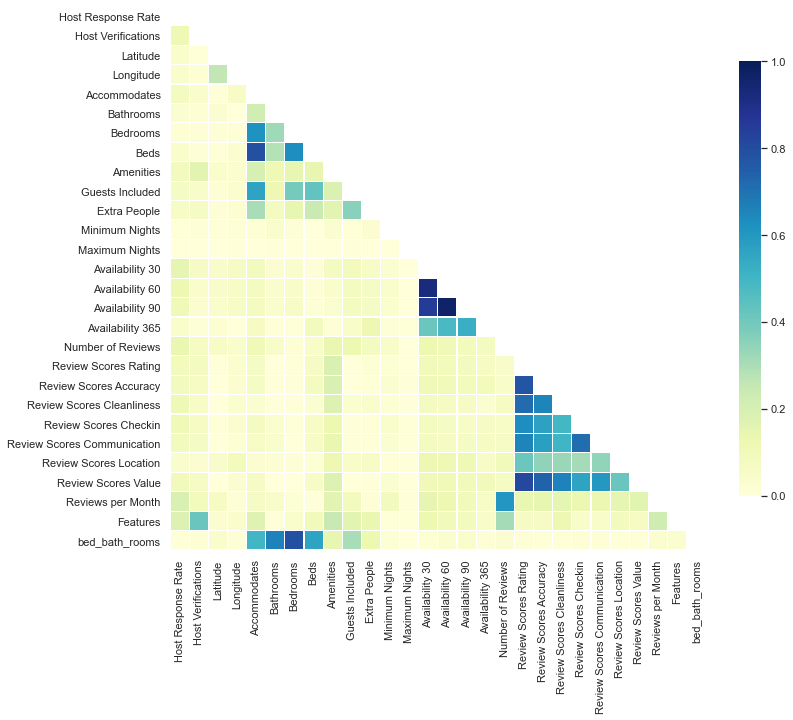

In [51]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


Observamos lo siguiente:
- Alta correlación de la variable accomodates con beds y bedsrooms. Estas dos últimas variables también tienen una correlación significativa. Todo esto es acorde a lo que nos esperamos (cuántas más haitaciones, más camas). <br>De estas variables vamos a eliminar "Beds" porque es la que menos correlación tiene con la objetivo.

In [52]:
print(data['Accommodates'].corr(data['Price']))
print(data['Bedrooms'].corr(data['Price']))
print(data['Beds'].corr(data['Price']))

0.614992555540497
0.4641868248030412
0.44224282734446174


In [53]:
data.drop('Beds', axis = 1, inplace = True)

<br>

- Muy alta correlacón en las variables de availability. <br> Borramos todas y mantenemos la de "Availability 365" porque es la que mayor correlación tiene con la varaible objetivo "Price"

In [54]:
print(np.abs(data['Availability 30'].corr(data['Price'])))
print(np.abs(data['Availability 60'].corr(data['Price'])))
print(np.abs(data['Availability 90'].corr(data['Price'])))
print(np.abs(data['Availability 365'].corr(data['Price'])))

0.06456166582920826
0.0633817039923209
0.07140992909975326
0.07709982732348063


In [55]:
data.drop(['Availability 30','Availability 60','Availability 90'], axis = 1, inplace = True)

<br>

- Alta correlación de la variables adicional que hemos creado "bed_bath_rooms" con "bathrooms" y "bedrooms" pero esto entra dentro de lo que esperabamos ya que se ha creado a partir de ellas. <br> De momento la mantenemos y analizaremos como se comporta el modelo para analizar si ha sido o no una buena idea mantenerla.

<br>

- Vemos también alta correlación en el grupo de variables de reviews:

In [56]:
data.columns[data.columns.str.startswith("Review")]

Index(['Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Reviews per Month'],
      dtype='object')

In [57]:
print(data['Review Scores Rating'].corr(data['Review Scores Value']))
print(data['Review Scores Rating'].corr(data['Price']))
print(data['Review Scores Value'].corr(data['Price']))

0.8162894974585339
0.07191488957451092
0.03521040550459772


In [58]:
data.drop('Review Scores Value', axis = 1, inplace = True)

In [59]:
print(data['Number of Reviews'].corr(data['Reviews per Month']))
print(np.abs(data['Number of Reviews'].corr(data['Price'])))
print(np.abs(data['Reviews per Month'].corr(data['Price'])))

0.6017320717096143
0.006794047054337738
0.045665698583562266


In [60]:
data.drop('Number of Reviews', axis = 1, inplace = True)

In [61]:
data[['Review Scores Rating','Review Scores Accuracy']]

,Review Scores Rating,Review Scores Accuracy
0,97.0,10.0
2,88.0,8.0
3,100.0,10.0
5,93.0,10.0
6,NaN,NaN
...,...,...
11819,83.0,9.0
11820,NaN,NaN
11821,95.0,10.0
11822,NaN,NaN


In [62]:
print(data['Review Scores Rating'].corr(data['Review Scores Accuracy']))
print(np.abs(data['Review Scores Rating'].corr(data['Price'])))
print(np.abs(data['Review Scores Accuracy'].corr(data['Price'])))

0.774913757569412
0.07191488957451092
0.07567960097080921


In [63]:
data.drop('Review Scores Rating', axis = 1, inplace = True)

In [64]:
print(data['Review Scores Communication'].corr(data['Review Scores Checkin']))
print(np.abs(data['Review Scores Communication'].corr(data['Price'])))
print(np.abs(data['Review Scores Checkin'].corr(data['Price'])))

0.7144483045476374
0.017660860105651988
0.0027712913213842165


In [65]:
data.drop('Review Scores Communication', axis = 1, inplace = True)

<br>

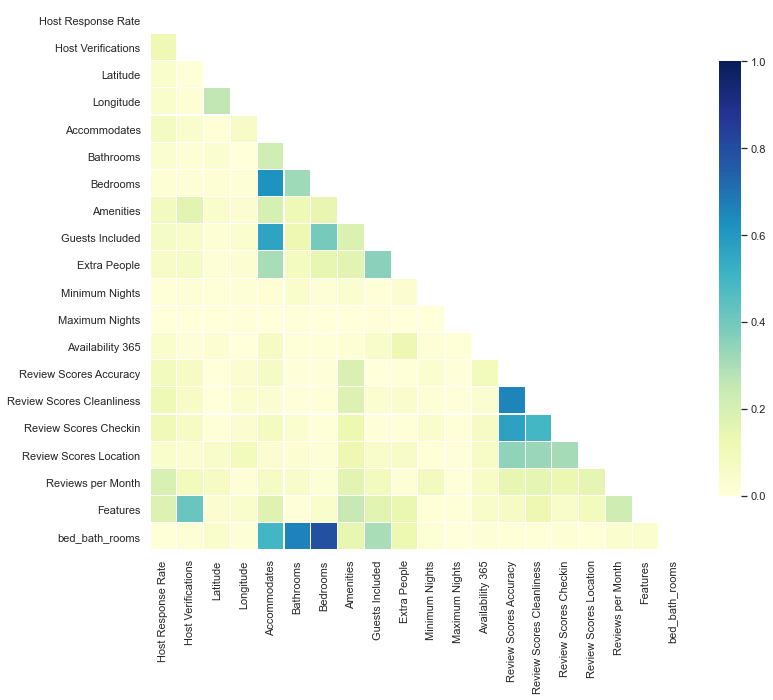

In [66]:
# Compute the correlation matrix
corr = np.abs(data.drop(['Price'], axis=1).corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


En el resto de variables de "Review" seguimos viendo alta correlación con rating, lo cual tiene sentido. Pero no las eliminaremos porque son aspectos distintos que pueden ser de interés. 
<br> También vemos, como he comentado ya antes, la alta correlación de la variable "bed_bath_rooms" pero de momento lo dejaremos así para ver si enriquece el modelo más adelante.

<br>

### Tratar los Nans:

In [67]:
data.columns[data.isnull().any()]

Index(['Host Since', 'Host Response Time', 'Host Response Rate', 'Bathrooms',
       'Bedrooms', 'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Location', 'Reviews per Month',
       'bed_bath_rooms'],
      dtype='object')

**Variable:** 
<br>HOST SINCE

In [68]:
print(f" Hay: {data['Host Since'].isnull().sum()} nans")
print(f" En porcentaje: {np.round((data['Host Since'].isnull().sum()/data.shape[0])*100,2)}%")

 Hay: 3 nans
 En porcentaje: 0.03%


In [69]:
data.dropna(subset=['Host Since'], inplace = True)

**Variable:** 
<br>HOST RESPONSE TIME

In [70]:
print(f" Hay: {data['Host Response Time'].isnull().sum()} nans")
print(f" En porcentaje: {np.round((data['Host Response Time'].isnull().sum()/data.shape[0])*100,2)}%")

 Hay: 1247 nans
 En porcentaje: 12.16%


In [71]:
print(f"Tipo de la variable: {data.dtypes['Host Response Time']}")
data["Host Response Time"].fillna(data["Host Response Time"].mode()[0], inplace=True)

Tipo de la variable: object


**Variable:** 
<br>HOST RESPONSE RATE

In [72]:
print(f"Tipo de la variable: {data.dtypes['Host Response Rate']}")
print(f"Porcentaje de nan: {np.round((data['Host Response Rate'].isnull().sum()/data.shape[0])*100,2)}%")

Tipo de la variable: float64
Porcentaje de nan: 12.16%


Rellenamos con la media:

In [73]:
#Para comprobar que los nulos se cambian bien
i = data[data['Host Response Rate'].isnull()].index
print(data.loc[i[0],'Host Response Rate'])
print("La media con la que se debe rellenar es: ",data['Host Response Rate'].mean())

nan
La media con la que se debe rellenar es:  94.78774422735346


In [74]:
data["Host Response Rate"].fillna(data["Host Response Rate"].mean(), inplace=True)

In [75]:
print(data.loc[i[0],'Host Response Rate'])

94.78774422735346


<br>

In [76]:
data.dtypes[data.isnull().any()]

Bathrooms                    float64
Bedrooms                     float64
Review Scores Accuracy       float64
Review Scores Cleanliness    float64
Review Scores Checkin        float64
Review Scores Location       float64
Reviews per Month            float64
bed_bath_rooms               float64
dtype: object

Vemos que las que quedan son de tipo float y todas las vamos a rellenar con la media de sus datos correspondientes. <br> (Ya hemos comprobado más arriba que el porcentaje de campos vacíos es menor al 25%, por lo que podemos rellenar estos campos sin cometer grandes errores) 

In [77]:
#Estos ceros los hemos detectado abajo, con la visualización pero lo ponemos aqui porque
#al tratarse de errores no queremos que influyan en la media
data.drop(data[data['Bedrooms']==0].index, inplace = True)
data.drop(data[data['bed_bath_rooms']==0].index, inplace = True)
data.drop(data[data['Reviews per Month']==0].index, inplace = True)

In [78]:
cols = data.columns[data.isnull().any()]
for col in cols:
    data[col].fillna(data[col].mean(), inplace=True)

<br>

### Visualización de la distribución de las variable numéricas:

In [79]:
num_variables = [column for column, datatype in data.dtypes.items() if datatype in (np.int64, np.float64)]

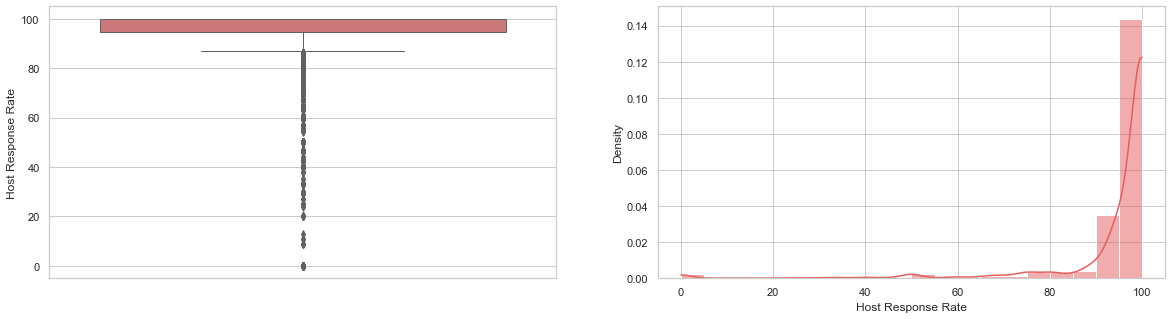

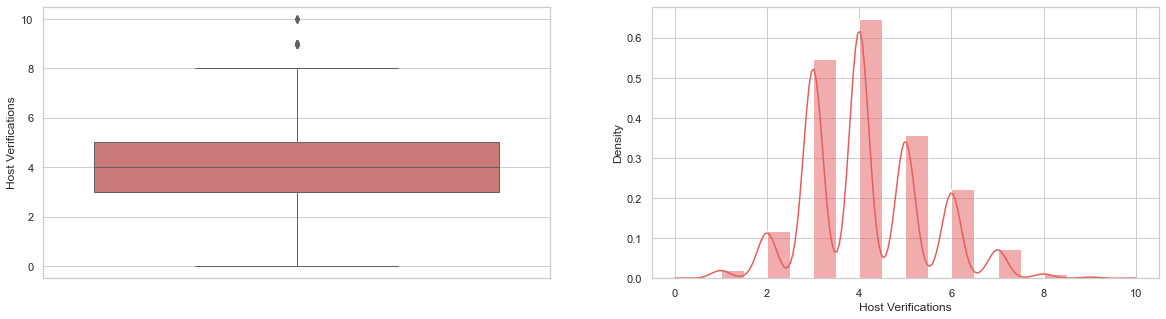

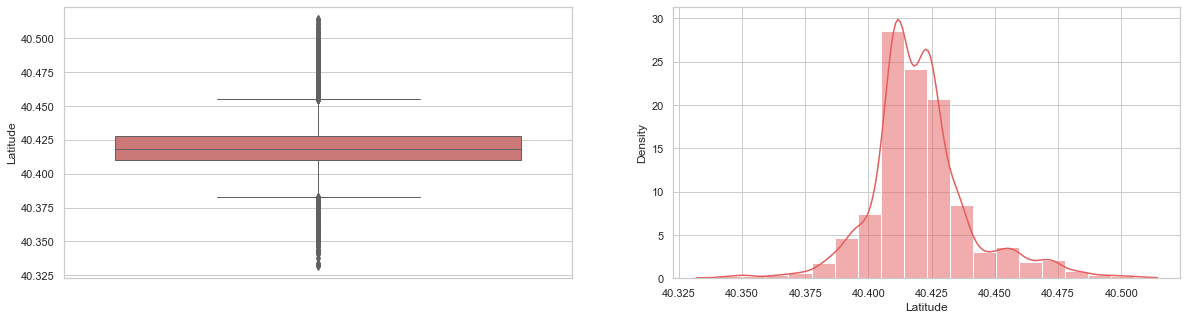

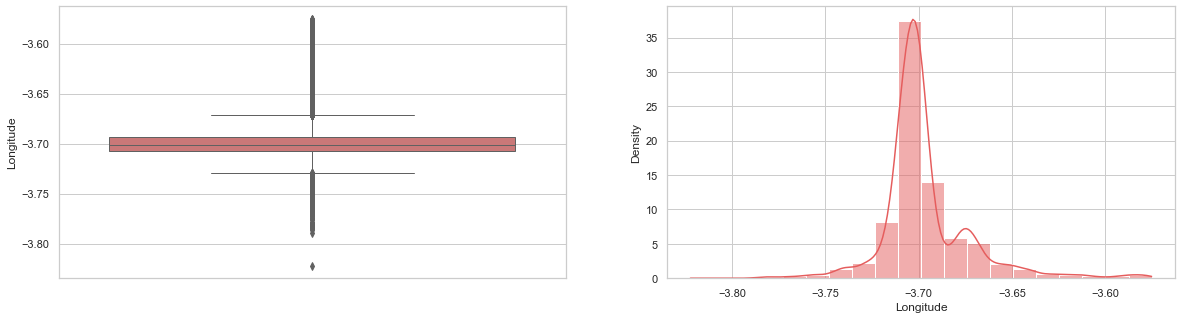

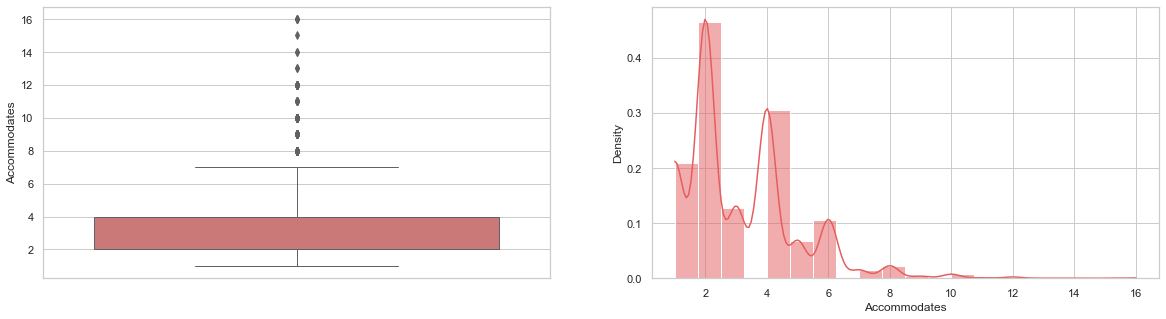

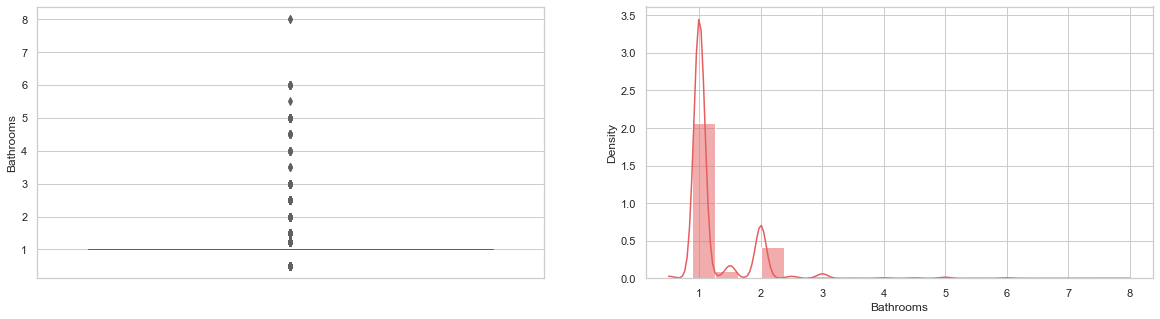

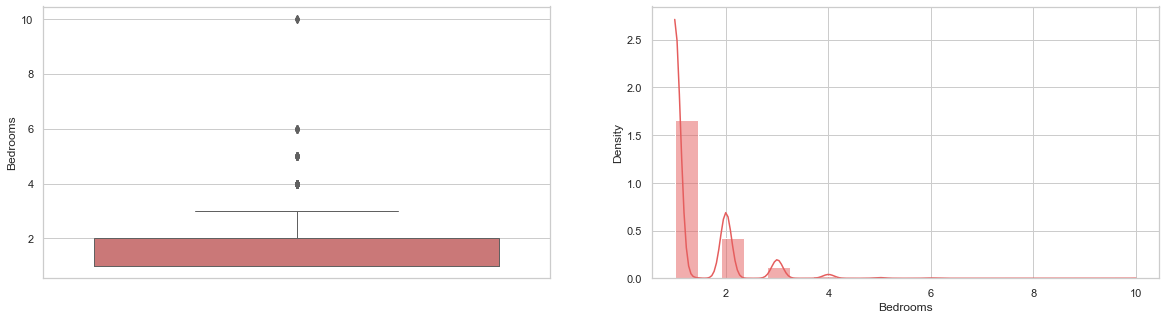

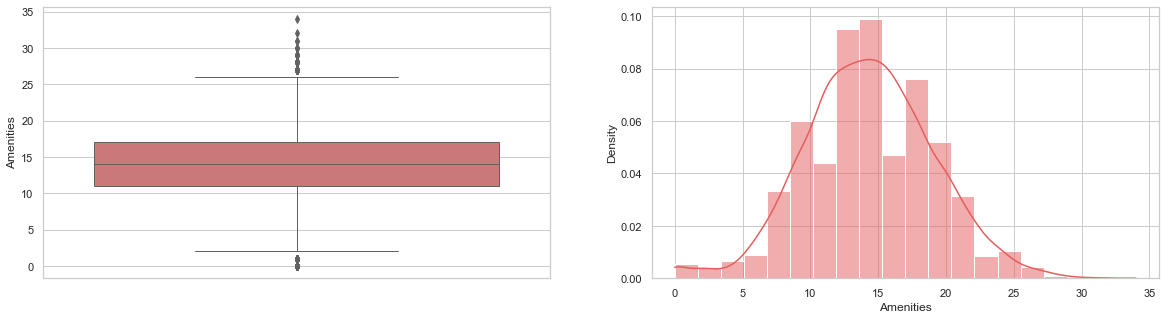

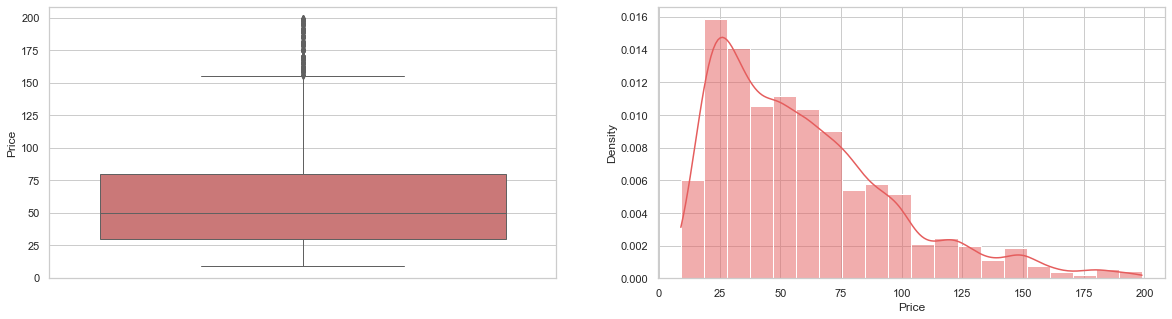

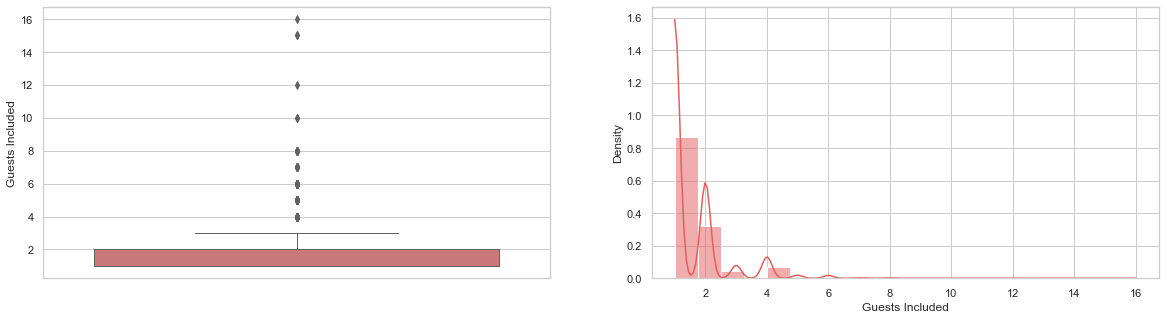

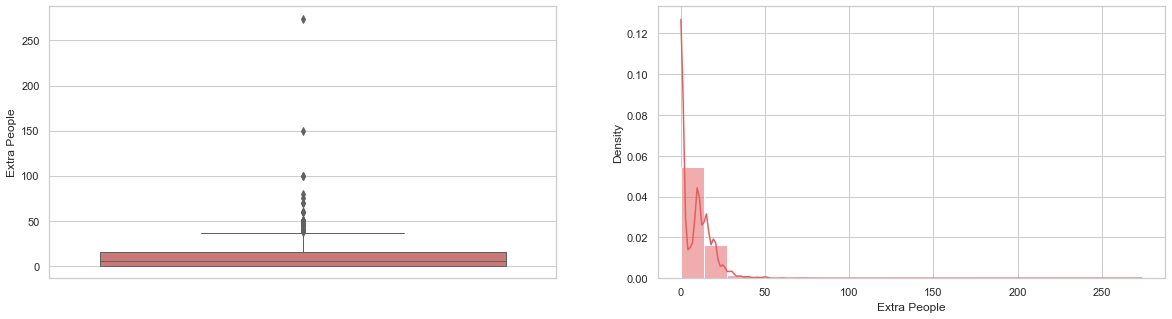

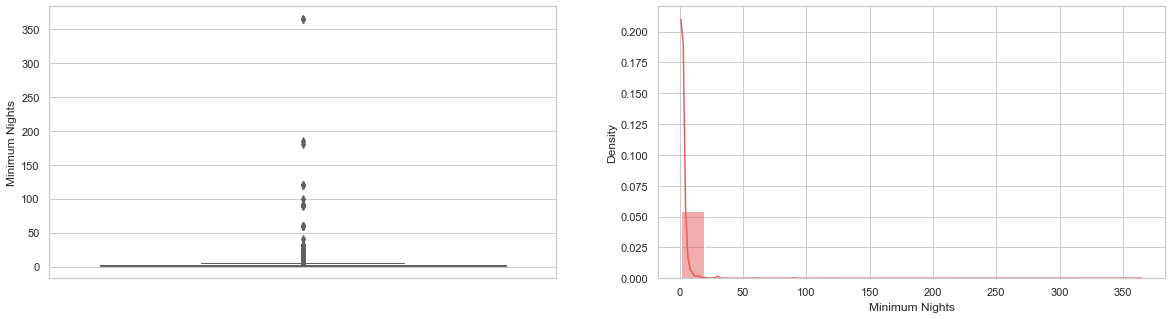

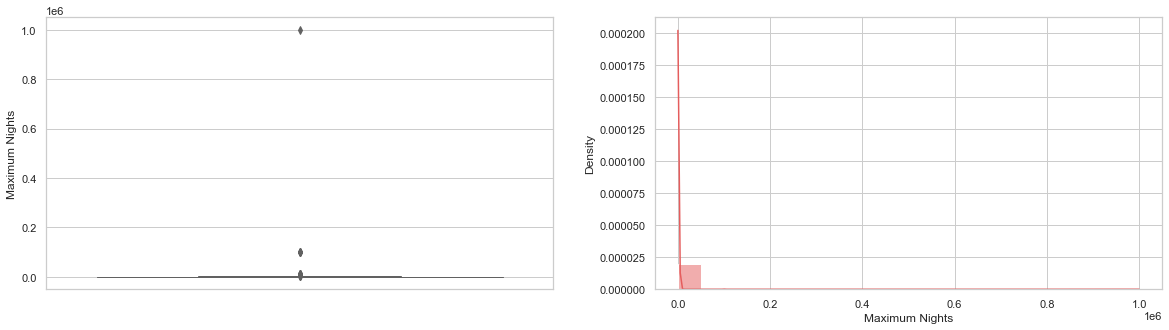

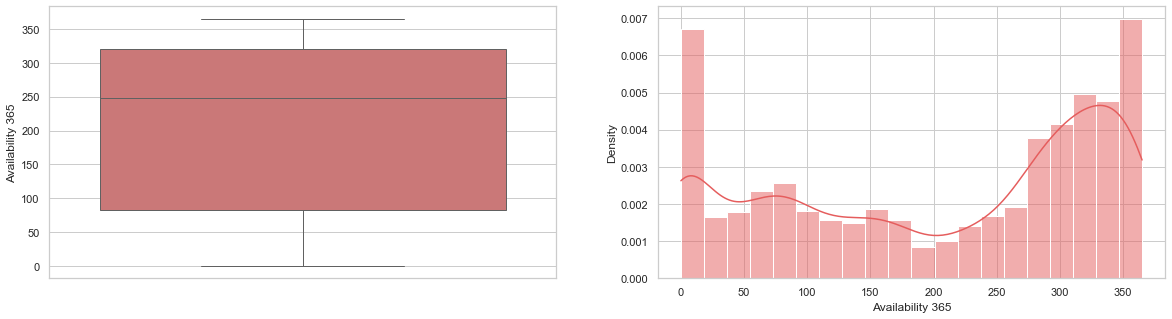

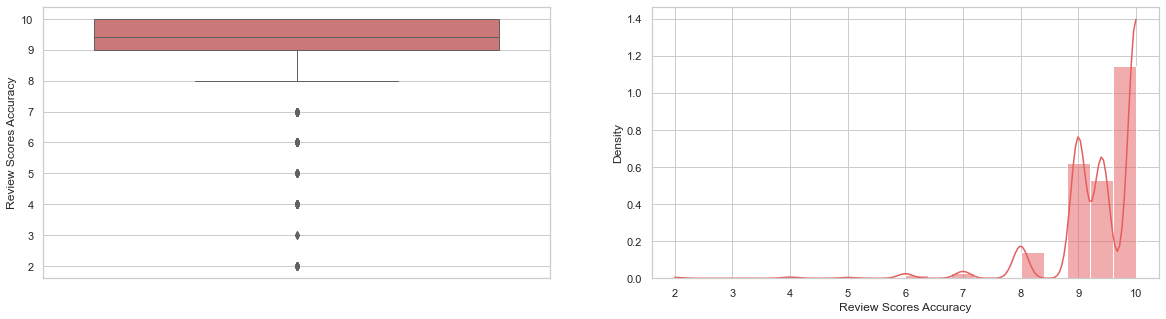

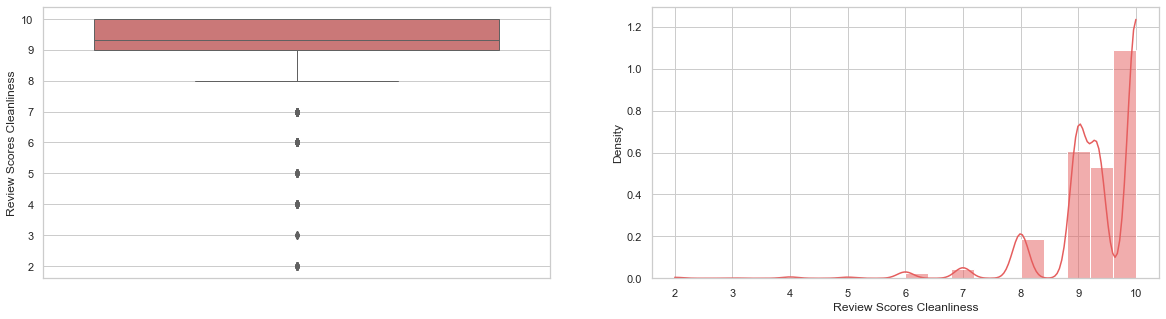

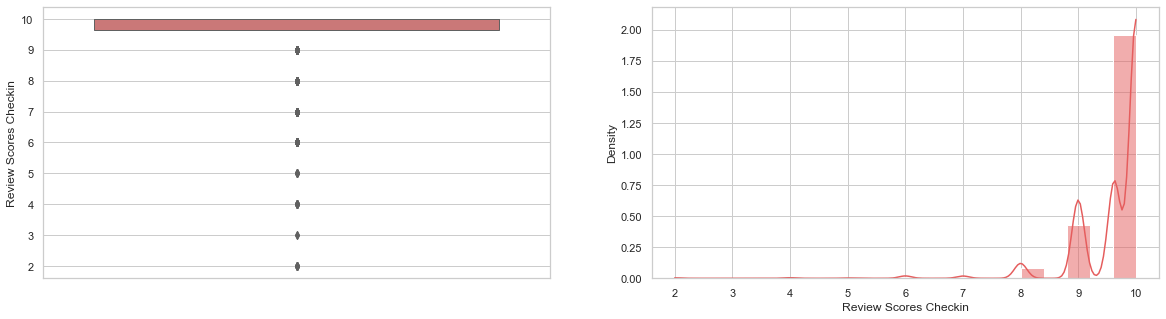

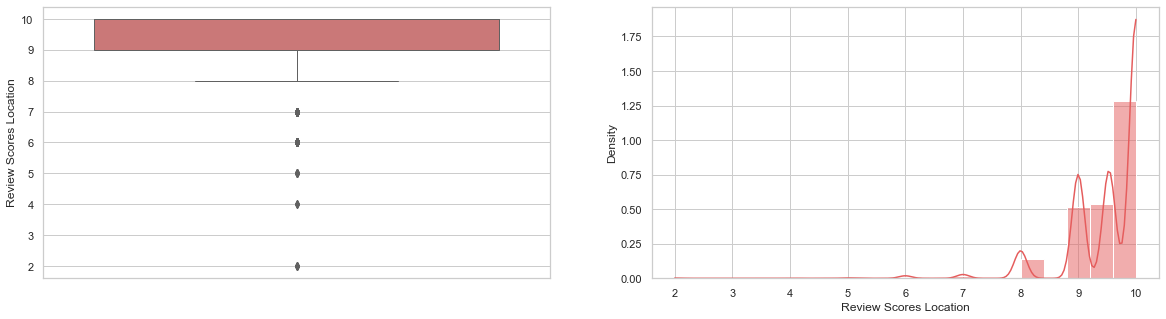

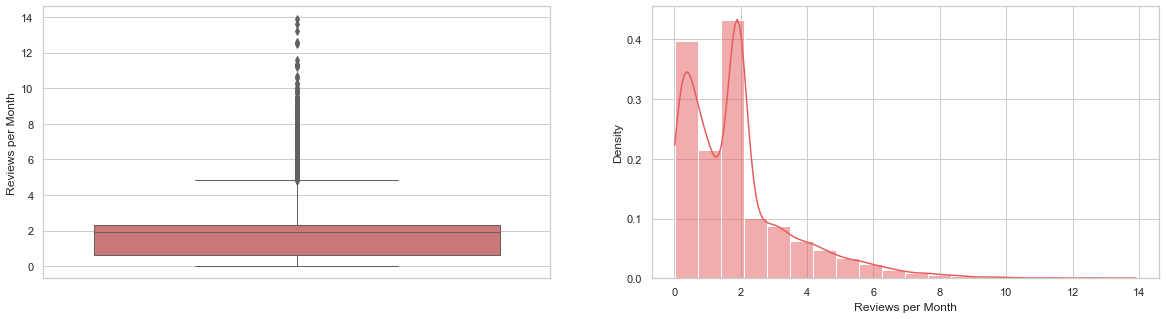

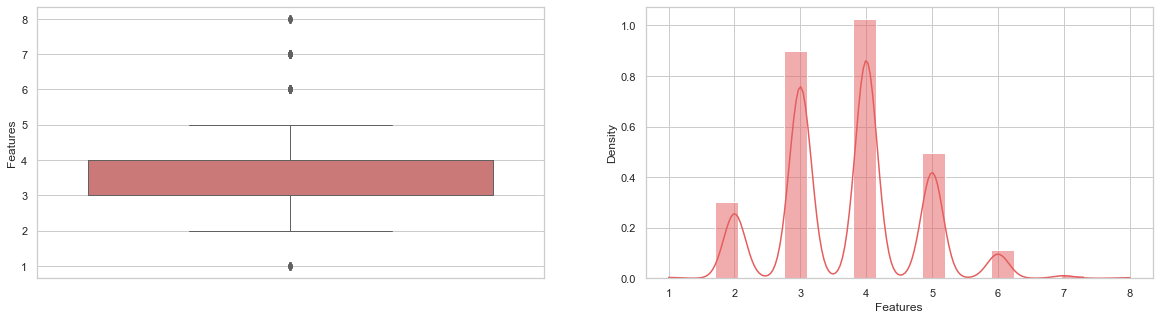

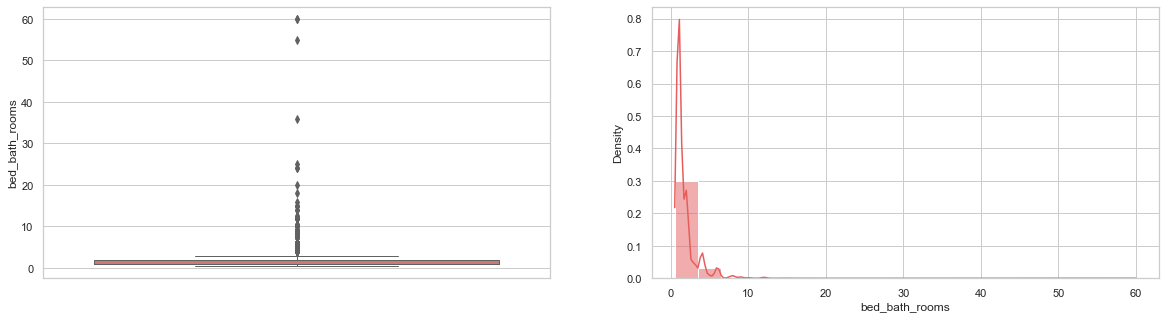

In [80]:
for col in num_variables:
    plt.subplots(nrows=1,ncols=2,figsize=(20,5),sharex=True)
    
    plt.subplot(1,2,1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(data=data, y=col, saturation = 0.6, linewidth = 1, color = '#E55D5D')

    plt.subplot(1,2,2)
    sns.set_theme(style="whitegrid")
    sns.histplot(data[col],color = '#E55D5D', bins = 20,kde = True, stat='density')
    
    

In [81]:
data['bed_bath_rooms'].dtype

dtype('float64')

In [82]:
print(f"Tenemos: {data.shape[0]} filas")

Tenemos: 9459 filas


Errors:
- Bedrooms: ==0 
- bed_bath_rooms: == 0

Apply log a:
- Reviews per month
- bed_bath_rooms

Outliers:
- Accomodates : >8

In [83]:


data = data[data['bed_bath_rooms']>0] 
data['bed_bath_rooms'] = data['bed_bath_rooms'].apply(lambda x: np.log(x))

data = data[data['Reviews per Month']>0] 
data['Reviews per Month'] = data['Reviews per Month'].apply(lambda x: np.log(x))

data = data[data['Accommodates']<8]

In [84]:
print(f"Tenemos: {data.shape[0]} filas")

Tenemos: 9185 filas


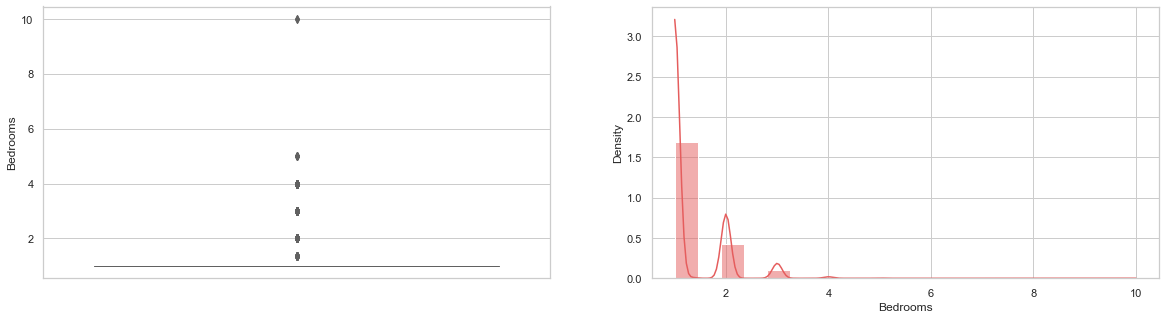

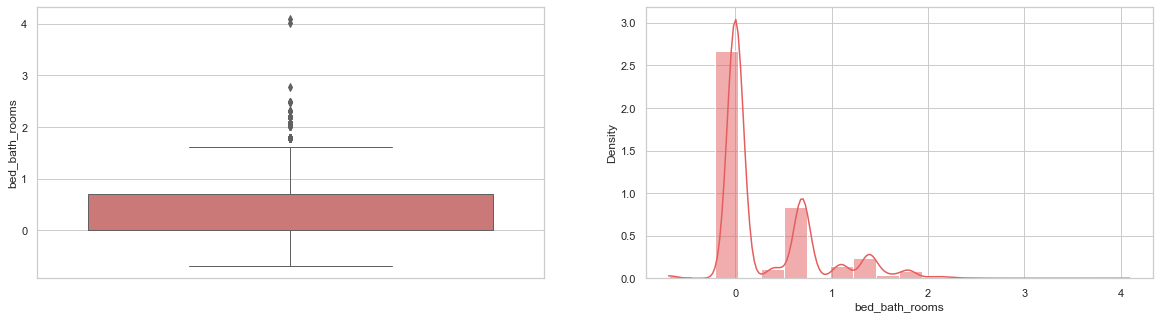

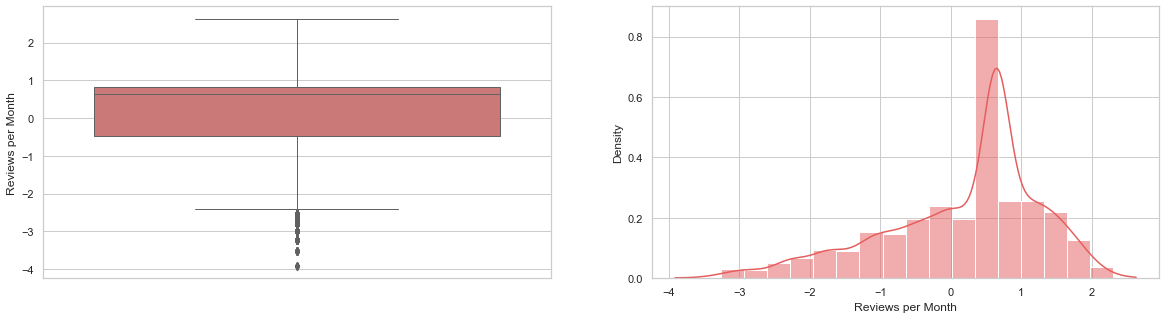

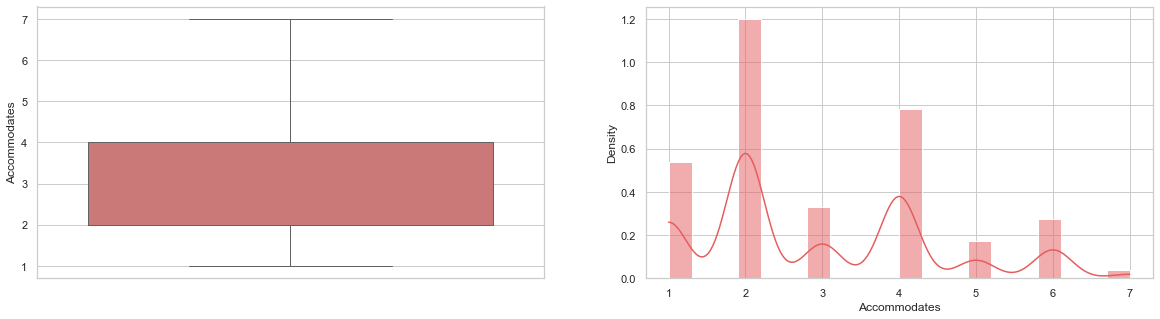

In [85]:
cols = ['Bedrooms','bed_bath_rooms','Reviews per Month','Accommodates']
for col in cols:
    plt.subplots(nrows=1,ncols=2,figsize=(20,5),sharex=True)
    
    plt.subplot(1,2,1)
    sns.set_theme(style="whitegrid")
    sns.boxplot(data=data, y=col, saturation = 0.6, linewidth = 1, color = '#E55D5D')

    plt.subplot(1,2,2)
    sns.set_theme(style="whitegrid")
    sns.histplot(data[col],color = '#E55D5D', bins = 20,kde = True, stat='density')
    
    

### Transformación de variables categóricas:

In [86]:
data.dtypes[data.dtypes == 'object']

Host Since                      object
Host Response Time              object
Neighbourhood Group Cleansed    object
Property Type                   object
Room Type                       object
Bed Type                        object
Cancellation Policy             object
dtype: object

**Variable:** 
<br>HOST SINCE

In [87]:
data['Host Since'] = data['Host Since'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d'))

In [88]:
max(data['Host Since'])

Timestamp('2017-04-07 00:00:00')

En la documentación vemos que los datos se han actualizado por última vez el October 3, 2020 a las 3:03 PM. <br> Esto choca con que la fecha más reciente del Host es del año 2017, de todas formas vamos a modificar esta variable de "Host Since" en el número de año que lleva el usuario en la plataforma hasta 2020 (última modificación).

In [89]:
data['year'] = data['Host Since'].apply(lambda x: 2020 - x.year)

In [90]:
data.drop('Host Since', axis = 1, inplace = True)

Para las demás variables categóricas vamos a hacer un mean encoder:

In [91]:
cols = data.columns[data.dtypes == 'object']
# Creamos un dict para usarlo después en test
mean_map = {}
for col in cols:
    mean = data.groupby(col)['Price'].mean()
    data[col] = data[col].map(mean)    
    mean_map[col] = mean

<br>

### Data lista:

In [92]:
data.shape

(9185, 28)

In [93]:
data.head()

,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Cancellation Policy,Reviews per Month,Features,bed_bath_rooms,year
0,58.816333,100.000000,6,40.656250,40.475645,-3.601166,59.820286,32.149658,2,1.0,1.0,58.225105,14,35.0,1,16,1,1125,80,10.000000,10.000000,10.000000,9.000000,64.581493,1.556037,4,0.000000,4
2,58.462043,93.000000,4,44.442623,40.412175,-3.718404,59.820286,78.916699,3,1.0,2.0,58.225105,9,49.0,3,8,2,1125,77,8.000000,9.000000,9.000000,9.000000,64.581493,0.703098,4,0.693147,5
3,54.015288,100.000000,4,31.822485,40.390722,-3.648710,59.820286,32.149658,1,2.0,1.0,58.225105,16,25.0,1,0,1,1125,334,10.000000,10.000000,10.000000,10.000000,49.878168,-1.714798,3,0.693147,5
5,58.462043,100.000000,5,65.817684,40.420304,-3.703645,59.820286,78.916699,4,1.0,2.0,58.225105,13,75.0,1,0,2,1125,22,10.000000,10.000000,10.000000,9.000000,59.343511,1.418277,4,0.693147,6
6,58.816333,94.787744,3,61.040816,40.442397,-3.697368,57.205128,32.149658,2,1.5,1.0,58.225105,11,50.0,1,0,2,1125,364,9.409854,9.330516,9.625538,9.533342,49.878168,0.646087,4,0.405465,4


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9185 entries, 0 to 11823
Data columns (total 28 columns):
Host Response Time              9185 non-null float64
Host Response Rate              9185 non-null float64
Host Verifications              9185 non-null int64
Neighbourhood Group Cleansed    9185 non-null float64
Latitude                        9185 non-null float64
Longitude                       9185 non-null float64
Property Type                   9185 non-null float64
Room Type                       9185 non-null float64
Accommodates                    9185 non-null int64
Bathrooms                       9185 non-null float64
Bedrooms                        9185 non-null float64
Bed Type                        9185 non-null float64
Amenities                       9185 non-null int64
Price                           9185 non-null float64
Guests Included                 9185 non-null int64
Extra People                    9185 non-null int64
Minimum Nights                  9185 n

In [95]:
data.isnull().sum()

Host Response Time              0
Host Response Rate              0
Host Verifications              0
Neighbourhood Group Cleansed    0
Latitude                        0
Longitude                       0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                       0
Bedrooms                        0
Bed Type                        0
Amenities                       0
Price                           0
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 365                0
Review Scores Accuracy          0
Review Scores Cleanliness       0
Review Scores Checkin           0
Review Scores Location          0
Cancellation Policy             0
Reviews per Month               0
Features                        0
bed_bath_rooms                  0
year                            0
dtype: int64

In [96]:
data.describe()

,Host Response Time,Host Response Rate,Host Verifications,Neighbourhood Group Cleansed,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Amenities,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Location,Cancellation Policy,Reviews per Month,Features,bed_bath_rooms,year
count,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.000000,9185.00000
mean,58.118019,94.680631,4.121720,58.118019,40.420392,-3.696702,58.118019,58.118019,2.948721,1.219426,1.294343,58.118019,14.250408,58.118019,1.508111,7.227763,2.866304,991.154164,204.244638,9.417593,9.335599,9.632301,9.533640,58.118019,0.178338,3.732281,0.328843,5.69178
std,1.559128,14.516947,1.302885,11.600586,0.020459,0.024223,5.768605,23.320299,1.538234,0.526264,0.585975,0.865217,4.737100,34.972027,0.910621,9.543623,7.782232,10642.091589,127.867213,0.801231,0.873278,0.666716,0.682128,6.385633,1.120771,1.038390,0.519710,1.62020
min,54.015288,0.000000,0.000000,31.072727,40.331888,-3.822403,17.000000,26.844262,1.000000,0.500000,1.000000,46.050000,0.000000,9.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,49.878168,-3.912023,1.000000,-0.693147,3.00000
25%,58.462043,94.787744,3.000000,51.119497,40.409649,-3.707749,59.820286,32.149658,2.000000,1.000000,1.000000,58.225105,11.000000,30.000000,1.000000,0.000000,1.000000,365.000000,79.000000,9.000000,9.000000,9.625538,9.000000,49.878168,-0.462035,3.000000,0.000000,4.00000
50%,58.816333,100.000000,4.000000,65.817684,40.418473,-3.701456,59.820286,78.916699,2.000000,1.000000,1.000000,58.225105,14.000000,50.000000,1.000000,5.000000,2.000000,1125.000000,245.000000,9.409854,9.330516,10.000000,10.000000,59.343511,0.646087,4.000000,0.000000,5.00000
75%,58.816333,100.000000,5.000000,65.817684,40.427812,-3.693318,59.820286,78.916699,4.000000,1.000000,1.000000,58.225105,17.000000,78.000000,2.000000,12.000000,3.000000,1125.000000,321.000000,10.000000,10.000000,10.000000,10.000000,64.581493,0.837248,4.000000,0.693147,7.00000
max,58.816333,100.000000,10.000000,67.097199,40.514247,-3.575142,140.000000,78.916699,7.000000,8.000000,10.000000,58.225105,34.000000,199.000000,16.000000,274.000000,365.000000,1000000.000000,365.000000,10.000000,10.000000,10.000000,10.000000,128.500000,2.631889,8.000000,4.094345,11.00000


<br>